<a href="https://colab.research.google.com/github/claredavies/DataEngAPITesting/blob/master/AnamolyDetection/KNN_anomaly_detection_request.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pycaret==2.3.5
!pip install scipy==1.4.1

     |████████████████████████████████| 288 kB 13.8 MB/s 
     |████████████████████████████████| 1.7 MB 65.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 69.2 MB/s 
     |████████████████████████████████| 167 kB 10.2 MB/s 
     |████████████████████████████████| 86 kB 4.6 MB/s 
     |████████████████████████████████| 6.8 MB 56.7 MB/s 
     |████████████████████████████████| 1.3 MB 57.8 MB/s 
     |████████████████████████████████| 261 kB 100.8 MB/s 
     |████████████████████████████████| 56 kB 2.5 MB/s 
     |████████████████████████████████| 15.6 MB 58.2 MB/s 
     |████████████████████████████████| 114 kB 65.8 MB/s 
     |████████████████████████████████| 3.1 MB 64.1 MB/s 
     |████████████████████████████████| 596 kB 83.3 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 
     |█████████████████

In [11]:
#import required libraries
from pycaret.anomaly import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [4]:
#uploading and reading RESTler output file with test cases
from google.colab import files
uploaded = files.upload()
dfr = pd.read_csv('test_cases_produced.csv')

Saving test_cases_produced.csv to test_cases_produced.csv


In [5]:
dfr

,Unnamed: 0,request_type,request_uri,request_body,response_code,response_time_microseconds
0,0,GET,/petclinic,NaN,302,15000
1,1,HEAD,/petclinic,NaN,302,0
2,2,POST,/petclinic,NaN,302,0
3,3,PUT,/petclinic,NaN,302,11000
4,4,DELETE,/petclinic,NaN,302,19000
...,...,...,...,...,...,...
16579,16579,GET,/petclinic/actuator,"{ ""firstName"":""fuzzstring"", ""id"":1, ""...",200,22000
16580,16580,GET,/petclinic/actuator,"{ ""firstName"":""fuzzstring"", ""id"":1, ""...",200,21000
16581,16581,GET,/petclinic/actuator,"{ ""firstName"":""fuzzstring"", ""id"":1, ""...",200,13000
16582,16582,GET,/petclinic/actuator,"{ ""firstName"":""fuzzstring"", ""id"":1, ""...",200,14000


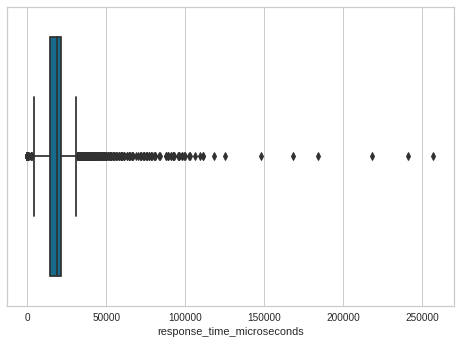

In [6]:
#boxplot of the response time 
sns.boxplot(dfr.response_time_microseconds)

In [7]:
#adding new column with count of response time per each response code
dfr['count'] = dfr.groupby(['response_code'])['response_time_microseconds'].transform('count')

In [8]:
dfr.head()

,Unnamed: 0,request_type,request_uri,request_body,response_code,response_time_microseconds,count
0,0,GET,/petclinic,NaN,302,15000,107
1,1,HEAD,/petclinic,NaN,302,0,107
2,2,POST,/petclinic,NaN,302,0,107
3,3,PUT,/petclinic,NaN,302,11000,107
4,4,DELETE,/petclinic,NaN,302,19000,107


In [14]:
#splitting out each response code
df_200 = dfr.loc[dfr['response_code']==200]
df_201 = dfr.loc[dfr['response_code']==201]
df_204 = dfr.loc[dfr['response_code']==204]
df_302 = dfr.loc[dfr['response_code']==302]
df_400 = dfr.loc[dfr['response_code']==400]
df_404 = dfr.loc[dfr['response_code']==404]
df_500 = dfr.loc[dfr['response_code']==500]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15121 entries, 7 to 16582
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  15121 non-null  int64 
 1   request_type                15121 non-null  object
 2   request_uri                 15121 non-null  object
 3   request_body                15120 non-null  object
 4   response_code               15121 non-null  int64 
 5   response_time_microseconds  15121 non-null  int64 
 6   count                       15121 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 945.1+ KB


TypeError: ignored

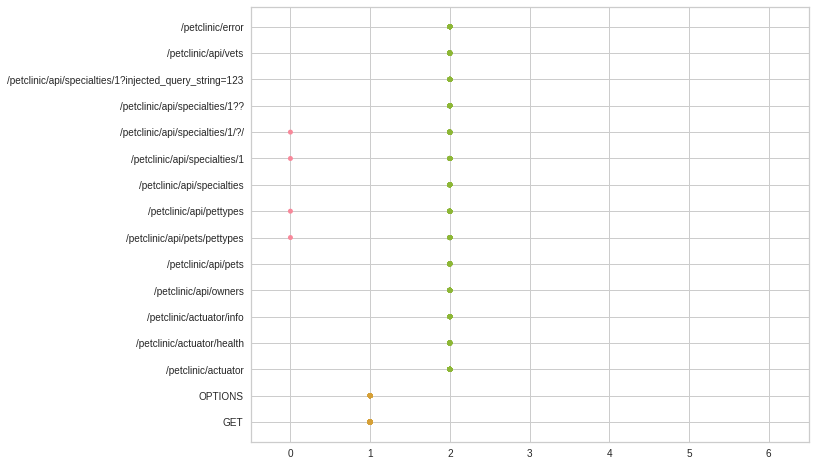

In [15]:
df_200.describe()
df_200.info()
plt.rcParams["figure.figsize"] = (10,8)
sns.swarmplot(x="variable", y="value", data=pd.melt(df_200))
plt.show()

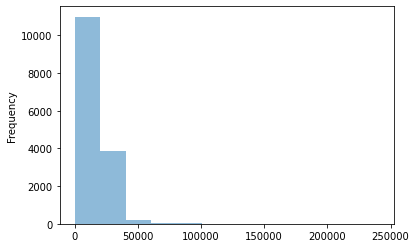

In [ ]:
#analyzing response time of response code=200
df_200['response_time_microseconds'].plot.hist(bins=12, alpha=0.5)

In [ ]:
df_200_train = df_200.iloc[:-10]
df_200_unseen = df_200.tail(10)

In [ ]:
# Setting the silent parameter to True automatically confirms the input of data types when setup is executed
anom = setup(data = df_200_train, 
             silent = True)

,Description,Value
0,session_id,4055
1,Original Data,"(15111, 7)"
2,Missing Values,True
3,Numeric Features,2
4,Categorical Features,5
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(15111, 28)"
9,CPU Jobs,-1


In [ ]:
anom_model = create_model(model = 'iforest', fraction = 0.05)
results = assign_model(anom_model)
plot_model(anom_model, plot = 'tsne')